In [1]:
import pandas as pd

In [2]:
from quoptuna import DataPreparation,Optimizer

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_name = "Blood"
study_name = "Blood"
optimizer = Optimizer(db_name=db_name,study_name=study_name)

In [4]:
optimizer.storage_location

'sqlite:///db/Blood.db'

In [5]:
optimizer.load_study()
study = optimizer.study

In [6]:
best_trial = study.best_trials

In [7]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score =(quantum_f1_score if quantum_f1_score!=0 else classical_f1_score if classical_f1_score!=0 else "N/A"
    )
    return f"Trial {trial.number} - F1 Score: {f1_score} {trial.params.get("model_type")}"

In [8]:
for trial in best_trial:
    print(format_trial(trial))

Trial 4 - F1 Score: 0.8652037617554859 DataReuploadingClassifier


In [9]:
model_params =best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.1,
 'n_input_copies': 2,
 'n_layers': 10,
 'observable_type': 'half',
 'repeats': 1,
 'C': 10,
 'gamma_factor': 0.1,
 'trotter_steps': 5,
 't': 0.01,
 'n_qfeatures': 'half',
 'n_episodes': 100,
 'visible_qubits': 'half',
 'temperature': 100,
 'encoding_layers': 3,
 'degree': 3,
 'n_qchannels': 1,
 'qkernel_shape': 2,
 'kernel_shape': 5,
 'filter_name': 'sharpen',
 'gamma': 0.1,
 'alpha': 0.01,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 10,
 'model_type': 'DataReuploadingClassifier'}

In [10]:
file_path= "data/Blood.csv"
data=pd.read_csv(file_path)
data

,Recency,Frequency,Monetary,Time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,-1
...,...,...,...,...,...
743,23,2,500,38,-1
744,21,2,500,52,-1
745,23,3,750,62,-1
746,39,1,250,39,-1


In [11]:
dp=DataPreparation(file_path=file_path,x_cols=list(data.columns.difference(["target"])),y_col="target")
data_dict=dp.get_data()

In [12]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [13]:
from quoptuna.backend.models import create_model
model= create_model(**model_params)

In [14]:
model.fit(data_dict["x_train"].values,data_dict["y_train"].values)




c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you expe

DataReuploadingClassifier(learning_rate=0.1, max_vmap=1, n_layers=10,
                          observable_type='half')

In [15]:
from quoptuna import XAI
from quoptuna.backend.xai.xai import XAIConfig
config = XAIConfig(use_proba=True,onsubset=True,subset_size=50)
xai = XAI(model=model,data=data_dict,config=config)
xai.get_report()







c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


{'confusion_matrix': array([[  6,  42],
        [  1, 138]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n          -1       0.86      0.12      0.22        48\n           1       0.77      0.99      0.87       139\n\n    accuracy                           0.77       187\n   macro avg       0.81      0.56      0.54       187\nweighted avg       0.79      0.77      0.70       187\n',
 'roc_curve': 'y should be a 1d array, got an array of shape (187, 2) instead.'}

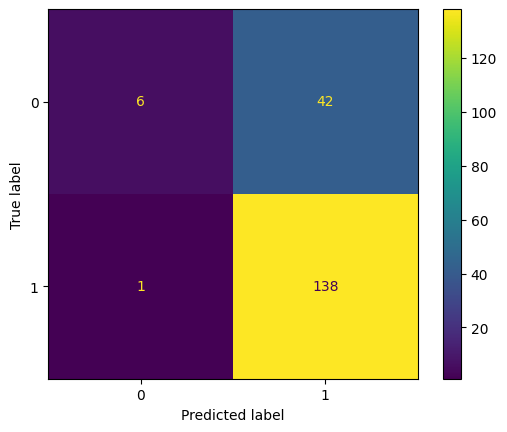

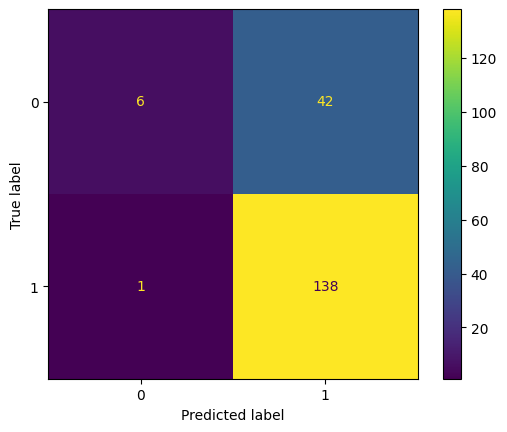

In [16]:
xai.plot_confusion_matrix()



In [17]:
xai.explainer.feature_names

['Frequency', 'Monetary', 'Recency', 'Time']

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\

''
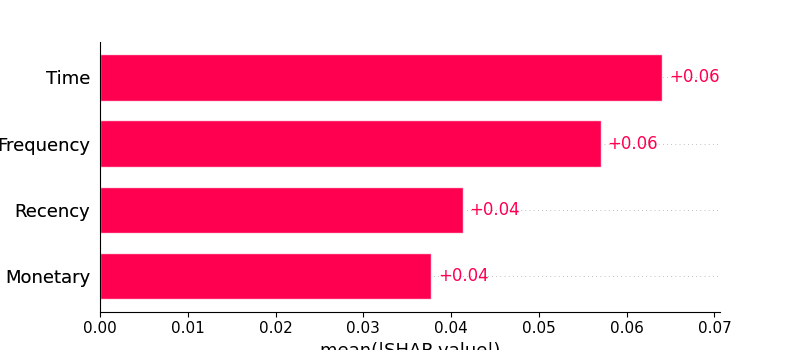

In [18]:
xai.get_plot("bar",max_display=5,class_index=1)

In [19]:
import os

In [22]:
from dotenv import load_dotenv
load_dotenv()






True

''
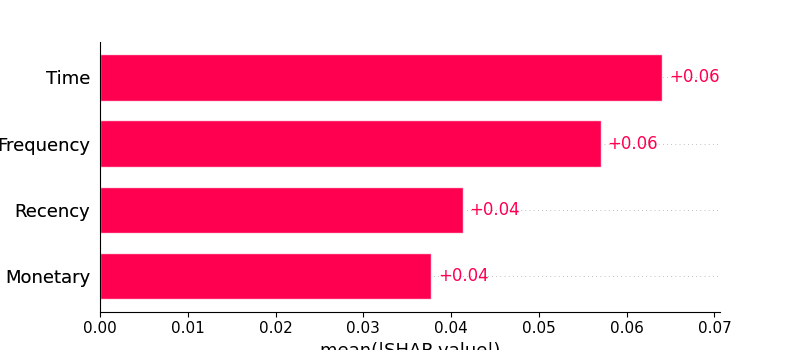

In [25]:
xai.get_plot("bar",max_display=5,class_index=1)

In [26]:
# report = xai.generate_report_with_langchain(provider="google",api_key=os.getenv("GOOGLE_GEMINI_API_KEY"),model_name="gemini-1.5-flash")

In [27]:
import random
from quoptuna.backend.xai.xai import PlotType
import io
import base64
import matplotlib.pyplot as plt
def generate_report_images( num_waterfall_plots: int):
        images: dict[str, str] = {}  # Change type hint to allow string keys
        plot_types: list[PlotType] = ["bar", "beeswarm", "violin", "heatmap"]

        try:
            for plot_type in plot_types:
                images[plot_type] = xai.get_plot(plot_type,class_index=1)

            # if xai.onsubset:
            #     num_waterfall_plots = min(num_waterfall_plots, xai.subset_size)
            # else:
            #     num_waterfall_plots = min(num_waterfall_plots, len(xai.x_test))

            # indices = sorted(random.sample(range(num_waterfall_plots), num_waterfall_plots))
            # for i in indices:
            #     waterfall_plot_type: PlotType = "waterfall"
            #     images[f"{waterfall_plot_type}_{i}"] = xai.get_plot(waterfall_plot_type, index=i)

            fig = xai.plot_confusion_matrix()
            img_buf = io.BytesIO()
            fig.savefig(img_buf, format="png")
            img_buf.seek(0)
            img_base64 = base64.b64encode(img_buf.getvalue()).decode("utf-8")
            images["confusion_matrix"] = f"data:image/png;base64,{img_base64}"
            plt.close(fig)

        except Exception as e:
            msg = f"Error generating plots: {e}"
            raise ValueError(msg) from e

        return images

In [28]:
images = generate_report_images(5)

In [32]:

chat = xai._initialize_chat(api_key=os.getenv("GOOGLE_GEMINI_API_KEY"),model_name="models/gemini-2.5-pro",provider="google")

report = xai.get_report()
images = generate_report_images(5)
with open(r"C:\Users\aneen\Documents\GitHub\quoptuna\src\quoptuna\backend\xai\prompt.txt", "r", encoding="utf-8") as f:
    prompt2 = f.read()

Dataset_info={
    "URL": "https://archive.ics.uci.edu/dataset/250/blood-transfusion-service-center",
    "Description": "To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).",
    "Features": ["R", "F", "M", "T"],
    "Target": "March_2007_Donation"
}
report=xai._generate_final_report(chat, report, images, prompt2+str(Dataset_info))

In [33]:
print(report)

### **AI Model Governance and Evaluation Report**

**Model Name:** Blood Donation Prediction Model
**Date of Report:** October 26, 2023
**Version:** 1.0

---

### **1.0 Executive Summary**

This report provides a comprehensive evaluation of the Blood Donation Prediction Model, designed to predict whether a past donor will donate blood in March 2007. The analysis is framed within AI governance principles to ensure transparency, fairness, and accountability.

The model demonstrates strong performance in identifying donors (**Recall of 99.3%**) but struggles significantly to correctly identify non-donors, resulting in a high number of false positives. The overall accuracy is **77.0%**. The most influential features in the model's predictions are **Time** (months since first donation) and **Frequency** (total number of donations).

Key risks identified include the potential for inefficient resource allocation due to the high rate of false positives and a counter-intuitive model behavior wh

In [ ]:
print(report)

### **AI Model Governance and Evaluation Report**

**Model Name:** Classification Model (Inferred)
**Report Date:** October 26, 2023
**Report ID:** M-EVAL-2023-10-26-001

---

### **1.0 Executive Summary**

This report provides a comprehensive evaluation of the classification model based on its performance metrics and SHAP (SHapley Additive exPlanations) value analysis. The model demonstrates an overall accuracy of 77.0%, but a detailed review reveals a significant performance imbalance between the two classes. While it excels at identifying the positive class (Class 1), it performs poorly on the negative class (Class 0), indicating a strong bias towards the majority class. The primary drivers of the model's predictions are the `Time` and `Frequency` features. This report outlines the model's strengths, critical weaknesses, potential risks, and provides actionable recommendations for remediation and governance to ensure fairness, transparency, and robustness before deployment.

---

##

In [45]:
print(report)

## AI Model Evaluation and Governance Report

**Model Name:** [Model Name Placeholder]
**Date of Evaluation:** October 26, 2023
**Objective:** To assess the performance, interpretability, and potential governance risks of the classification model based on validation dataset metrics and SHAP analysis.

---

## 1. Evaluation Metrics Analysis

The model demonstrates exceptional performance on the evaluated dataset, achieving perfect classification across all standard metrics.

### 1.1 Confusion Matrix Interpretation

The confusion matrix provides the following counts for the binary classification task (Class 0 and Class 1):

| True Label | Predicted Label 0 | Predicted Label 1 |
| :---: | :---: | :---: |
| **0** | True Negatives (TN): **152** | False Positives (FP): **0** |
| **1** | False Negatives (FN): **0** | True Positives (TP): **191** |
| **Total Instances:** | 343 | |

### 1.2 Performance Metric Calculation

Based on the confusion matrix, the following performance metrics are deri

''
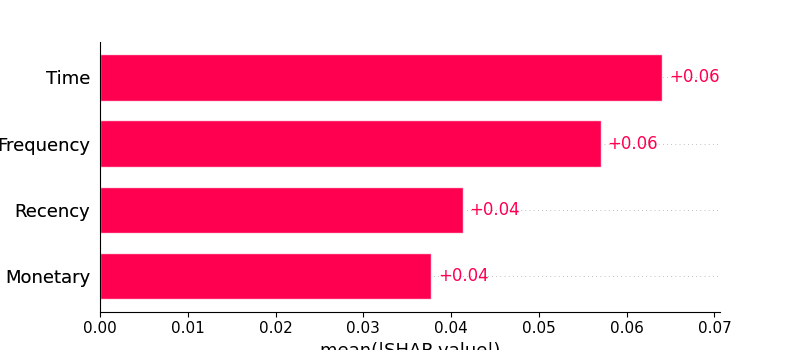

In [36]:
xai.get_plot("bar",max_display=5,class_index=1,save_config={"save_path": "./", "save_name": "bar.png", "save_format": "png", "save_dpi": 300})


''
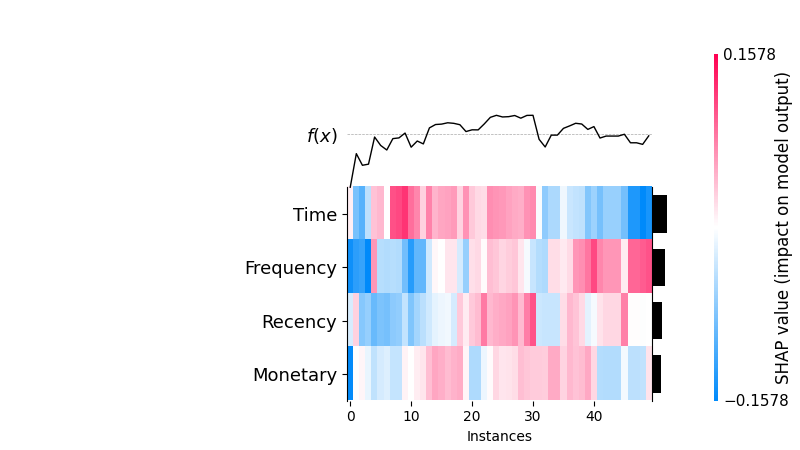

In [37]:
xai.get_plot("heatmap",max_display=5,class_index=1,save_config={"save_path": "./", "save_name": "heatmap.png", "save_format": "png", "save_dpi": 300})


''
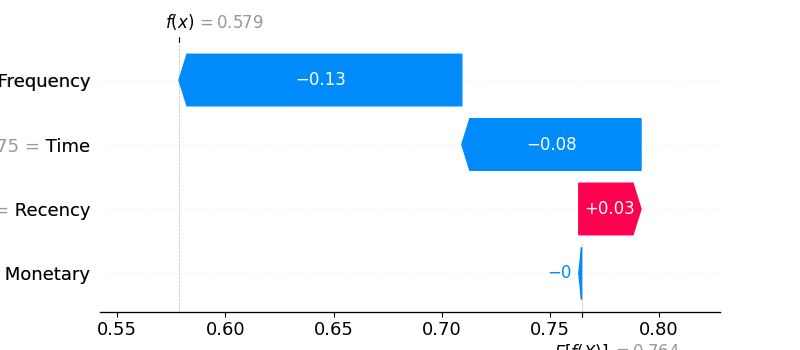

In [38]:
xai.get_plot("beeswarm",max_display=5,class_index=1,save_config={"save_path": "./", "save_name": "beeswarm.png", "save_format": "png", "save_dpi": 300})

xai.get_plot("violin",max_display=5,class_index=1,save_config={"save_path": "./", "save_name": "violin.png", "save_format": "png", "save_dpi": 300})

xai.get_plot("waterfall",max_display=5,class_index=1,save_config={"save_path": "./", "save_name": "waterfall.png", "save_format": "png", "save_dpi": 300})


